In [50]:
%matplotlib inline
import cv2
import copy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,20))

<Figure size 720x1440 with 0 Axes>

<Figure size 720x1440 with 0 Axes>

In [51]:
img = cv2.imread('Test_Images/Mandrill.tiff')
img.shape

(512, 512, 3)

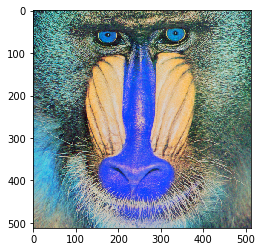

In [52]:
plt.imshow(img)

In [53]:
grayImg = np.zeros((img.shape[0], img.shape[1]))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        grayImg[i][j] = round((int(img[i][j][0]) + int(img[i][j][1]) + int(img[i][j][2]))/3)

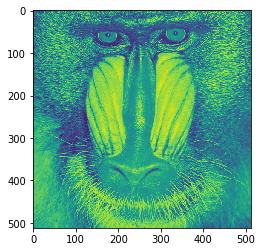

In [54]:
plt.imshow(grayImg)

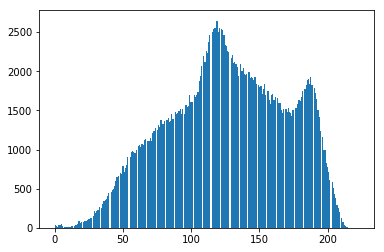

In [56]:
plt.hist(grayImg.ravel(),256)
plt.show()

In [57]:
unique, value = np.unique(grayImg, return_counts=True)
inten = dict(zip(unique,value))
L = len(inten)

In [58]:
prod = grayImg.shape[0]*grayImg.shape[1]
pdf = [inten[i]/prod for i in inten]

In [59]:
"""newMat = zeros(grayImg.shape)
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        newMat[i][j] = """
summy = 0
cdf = []
for i in range(len(pdf)):
    summy += pdf[i]
    cdf.append(summy)

In [61]:
newCdf = [int(i*(L - 1)) for i in cdf]
newCdfDict = {}
for i in range(len(newCdf)):
    newCdfDict[i] = newCdf[i]

In [62]:
newImg = np.zeros(grayImg.shape)
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        try:
            newImg[i][j] = newCdfDict[grayImg[i][j]]
        except:
            continue

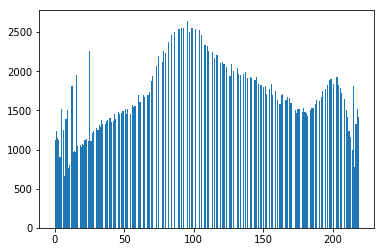

In [63]:
plt.hist(newImg.ravel(),256)
plt.show()

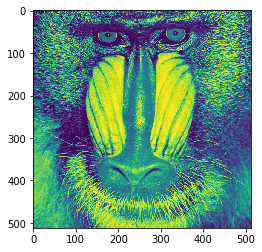

In [64]:
plt.imshow(newImg)

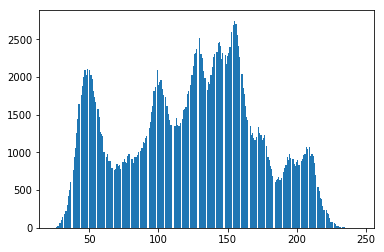

In [65]:
#Matching
newImg = cv2.imread('Test_Images/Lena.tiff', 0)
plt.hist(newImg.ravel(),256)
plt.show()

In [66]:
newImg.shape,grayImg.shape

((512, 512), (512, 512))

In [67]:
uniqueZ, valueZ = np.unique(newImg, return_counts=True)
intenZ = dict(zip(uniqueZ,valueZ))
L = len(intenZ)
prod = newImg.shape[0]*newImg.shape[1]
pdf = [intenZ[i]/prod for i in intenZ]
summy = 0
cdf = []
for i in range(len(pdf)):
    summy += pdf[i]
    cdf.append(summy)
newCdf = [int(i*(L - 1)) for i in cdf]
newCdfDict2 = {}
for i in range(len(newCdf)):
    newCdfDict2[i] = newCdf[i]

In [73]:
matchedHisto = {}
for i in newCdfDict:
    temp = newCdfDict[i]
    mini = 255
    for j in newCdfDict2:
        if abs(temp - newCdfDict2[j]) < mini:
            mini = abs(temp - newCdfDict2[j])
            matchedHisto[i] = j
        if mini == 0:
            break

In [74]:
matchedHisto

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 10,
 27: 10,
 28: 10,
 29: 10,
 30: 10,
 31: 10,
 32: 10,
 33: 12,
 34: 12,
 35: 12,
 36: 12,
 37: 14,
 38: 14,
 39: 14,
 40: 15,
 41: 15,
 42: 16,
 43: 16,
 44: 16,
 45: 17,
 46: 17,
 47: 18,
 48: 18,
 49: 18,
 50: 19,
 51: 19,
 52: 20,
 53: 20,
 54: 21,
 55: 21,
 56: 21,
 57: 22,
 58: 23,
 59: 23,
 60: 23,
 61: 24,
 62: 24,
 63: 25,
 64: 26,
 65: 26,
 66: 27,
 67: 27,
 68: 28,
 69: 29,
 70: 29,
 71: 30,
 72: 30,
 73: 31,
 74: 33,
 75: 34,
 76: 35,
 77: 36,
 78: 38,
 79: 39,
 80: 40,
 81: 42,
 82: 43,
 83: 46,
 84: 48,
 85: 49,
 86: 51,
 87: 52,
 88: 55,
 89: 56,
 90: 57,
 91: 59,
 92: 61,
 93: 62,
 94: 64,
 95: 65,
 96: 67,
 97: 68,
 98: 69,
 99: 70,
 100: 71,
 101: 72,
 102: 73,
 103: 73,
 104: 75,
 105: 75,
 106: 77,
 107: 77,
 108: 79,
 109: 80,
 110: 82,
 111: 83,
 112: 84,
 113: 

In [75]:
matchedImg = np.zeros(grayImg.shape)
for i in range(grayImg.shape[0]):
    for j in range(grayImg.shape[1]):
        try:
            matchedImg[i][j] = newCdfDict2[grayImg[i][j]]
        except:
            continue

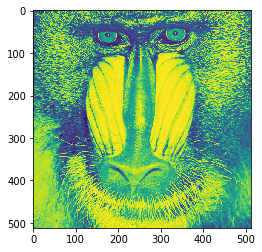

In [76]:
plt.imshow(matchedImg)

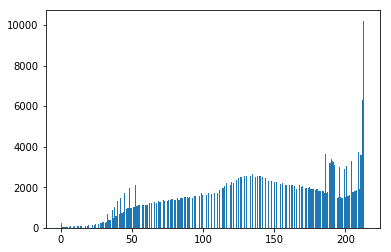

In [77]:
plt.hist(matchedImg.ravel(),256)
plt.show()